# 2. Unsupervised Learning

In [1]:
import warnings
warnings.simplefilter('ignore' )

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from __future__ import division
plt.rcParams['figure.figsize'] = (18,6) 

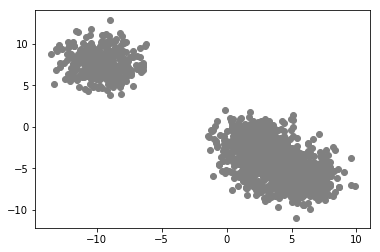

In [2]:
from sklearn import datasets
X, y = datasets.make_blobs(centers=4,n_samples=1500,n_features=2,cluster_std=1.5)
plt.scatter(X[:,0],X[:,1],c='gray')

In [3]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=4).fit(X)
model.cluster_centers_

array([[ 2.18208855, -1.6221363 ],
       [-9.68305598,  7.79615798],
       [ 5.92770484, -6.21197236],
       [ 2.96478144, -5.07649019]])

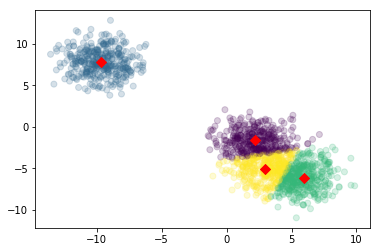

In [4]:
plt.scatter(X[:,0],X[:,1],c=model.labels_,cmap=plt.cm.viridis,alpha=.2)
centroids_x = model.cluster_centers_[:,0]
centroids_y = model.cluster_centers_[:,1]
plt.scatter(centroids_x,centroids_y,marker='D',c='r',s=50);

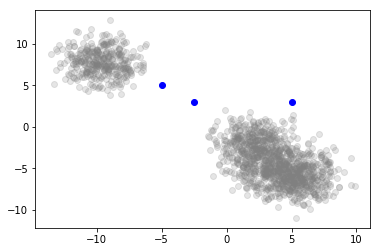

In [5]:
X_test = [(-5,5),(-2.5,3),(5,3)]
plt.scatter(X[:,0],X[:,1],c='gray',alpha=.2)
plt.scatter(list(zip(*X_test))[0],list(zip(*X_test))[1],c='b');

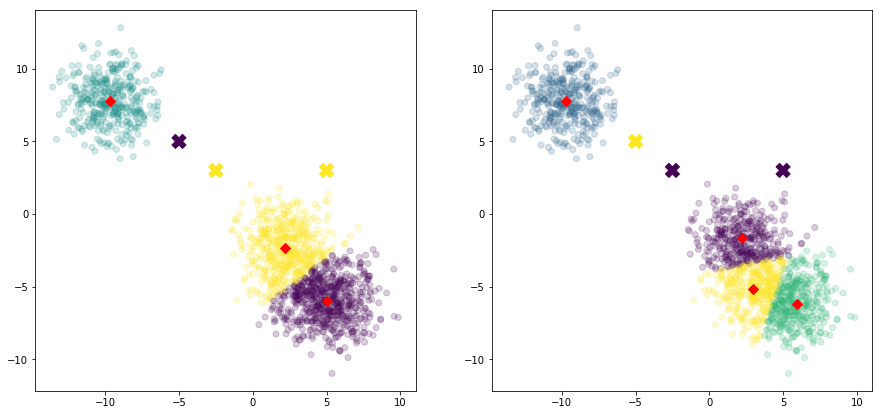

In [6]:
fig, ax = plt.subplots(1,2,figsize=(15,7))
model = KMeans(n_clusters=3)
model.fit(X)
ax[0].scatter(X[:,0],X[:,1],c=model.labels_,cmap=plt.cm.viridis,alpha=.2)
p_predict = model.predict(X_test)
centroids_x = model.cluster_centers_[:,0]
centroids_y = model.cluster_centers_[:,1]
ax[0].scatter(list(zip(*X_test))[0],list(zip(*X_test))[1],c=p_predict,cmap=plt.cm.viridis,marker='X',s=200)
ax[0].scatter(centroids_x,centroids_y,marker='D',c='r',s=50)

model = KMeans(n_clusters=4).fit(X)
p_predict = model.predict(X_test)
centroids_x = model.cluster_centers_[:,0]
centroids_y = model.cluster_centers_[:,1]
ax[1].scatter(X[:,0],X[:,1],c=model.labels_,cmap=plt.cm.viridis,alpha=.2)#kmeans.cluster_centers_
ax[1].scatter(list(zip(*X_test))[0],list(zip(*X_test))[1],c=p_predict,cmap=plt.cm.viridis,marker='X',s=200)
ax[1].scatter(centroids_x,centroids_y,marker='D',c='r',s=50);

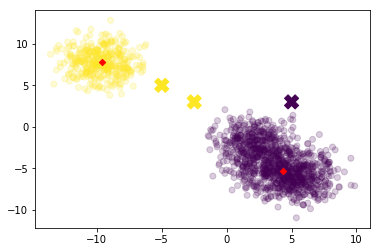

In [7]:
from sklearn.cluster import MeanShift, estimate_bandwidth
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=200)
model = MeanShift(bandwidth=bandwidth, bin_seeding=True)
model.fit(X)
plt.scatter(X[:,0],X[:,1],c=model.labels_,cmap=plt.cm.viridis,alpha=.2)
p_predict = model.predict(X_test)
centroids_x = model.cluster_centers_[:,0]
centroids_y = model.cluster_centers_[:,1]
plt.scatter(list(zip(*X_test))[0],list(zip(*X_test))[1],c=p_predict,cmap=plt.cm.viridis,marker='X',s=200)
plt.scatter(centroids_x,centroids_y,marker='D',c='r',s=20);

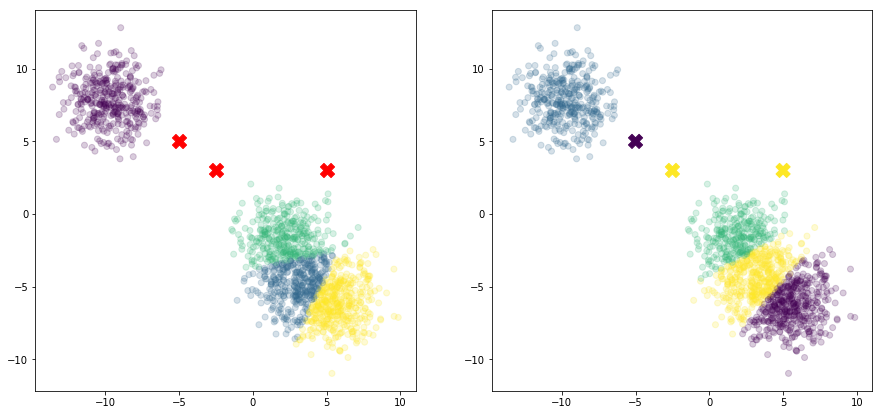

In [8]:
from sklearn.cluster import MiniBatchKMeans
mbk = MiniBatchKMeans(init='k-means++', n_clusters=4, batch_size=100,n_init=10, max_no_improvement=10, verbose=0,).fit(X)
fig, ax = plt.subplots(1,2,figsize=(15,7))
ax[0].scatter(X[:,0],X[:,1],c=mbk.labels_,cmap=plt.cm.viridis,alpha=.2)
p_predict = mbk.predict(X_test)
ax[0].scatter(list(zip(*X_test))[0],list(zip(*X_test))[1],c='r',marker='X',s=200)

mbk = MiniBatchKMeans(init='k-means++', n_clusters=4, batch_size=200,n_init=10, max_no_improvement=10, verbose=0,).fit(X)
ax[1].scatter(X[:,0],X[:,1],c=mbk.labels_,cmap=plt.cm.viridis,alpha=.2)
p_predict = mbk.predict(X_test)
ax[1].scatter(list(zip(*X_test))[0],list(zip(*X_test))[1],c=p_predict,cmap=plt.cm.viridis,marker='X',s=200);

Clusters for each point: [1 2 2]


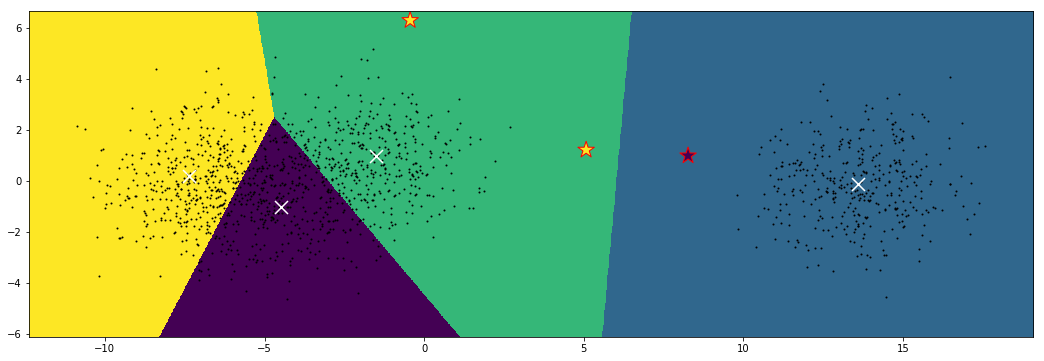

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_transform_ = pca.fit_transform(X)
kmeans = KMeans( n_clusters=4, )
kmeans.fit(pca_transform_)

h = .02

x_min, x_max = pca_transform_[:, 0].min() - 1.5, pca_transform_[:, 0].max() + 1.5
y_min, y_max = pca_transform_[:, 1].min() - 1.5, pca_transform_[:, 1].max() + 1.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(1,figsize=(18,6))
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.viridis,
           aspect='auto', origin='lower')

plt.plot(pca_transform_[:, 0], pca_transform_[:, 1], 'k.', markersize=2)
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=169, 
            linewidths=3, color='w', zorder=10)
x_pca = pca.transform(X_test)
x_pca_z = kmeans.predict(x_pca)
print("Clusters for each point: %s"%x_pca_z)
plt.scatter(x_pca[:, 0], x_pca[:, 1],c=x_pca_z,marker= '*', s=300,edgecolors='r');

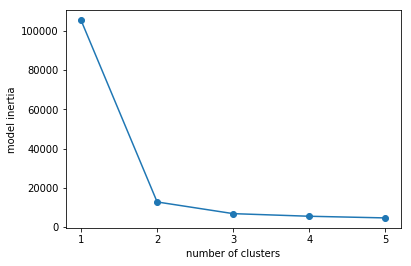

Best choice is 4 K clusters


In [10]:
ks = range(1, 6)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(X)
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters')
plt.ylabel('model inertia')
plt.xticks(ks)
plt.show()
print("Best choice is 4 K clusters")

Best n clusters: 4


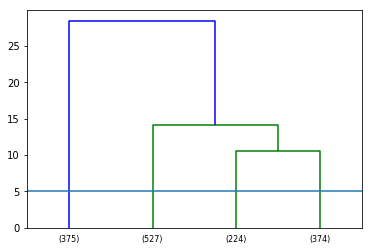

In [15]:
from scipy.cluster.hierarchy import linkage, dendrogram

mergings = linkage(X, method='complete')

dendrogram(mergings,labels=y, 
#            leaf_rotation=90,
           leaf_font_size=8,
         truncate_mode='lastp', p=4, show_leaf_counts=True)
# plt.xticks([])
# plt.ylim([4,25])
plt.legend()
plt.axhline(y=5);
print('Best n clusters: 4')

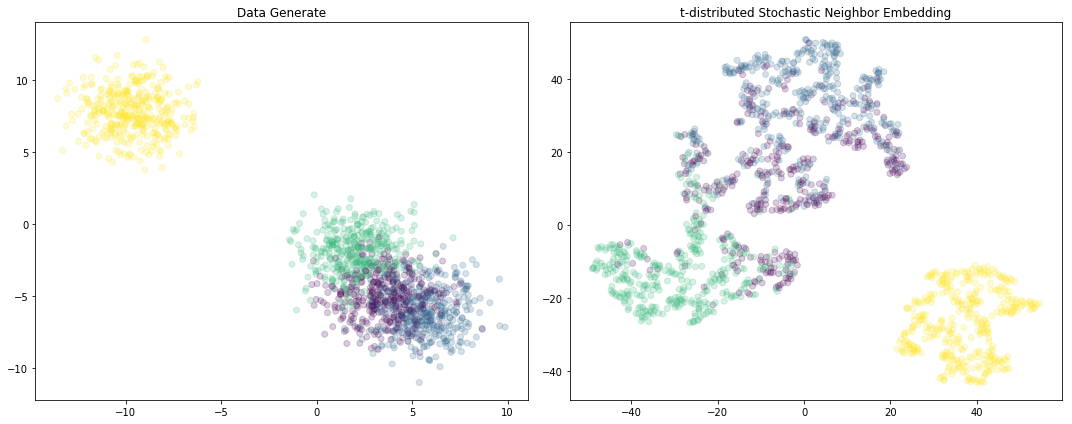

In [32]:
from sklearn.manifold import TSNE

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,6))
ax1.scatter(X[:,0],X[:,1],c=y,alpha=.2)
ax1.set_title('Data Generate')

model = TSNE(learning_rate=200)
tsne_features = model.fit_transform(X)
ax2.set_title('t-distributed Stochastic Neighbor Embedding')
ax2.scatter(tsne_features[:,0] ,tsne_features[:,1],c=y,alpha=.2)
plt.tight_layout();

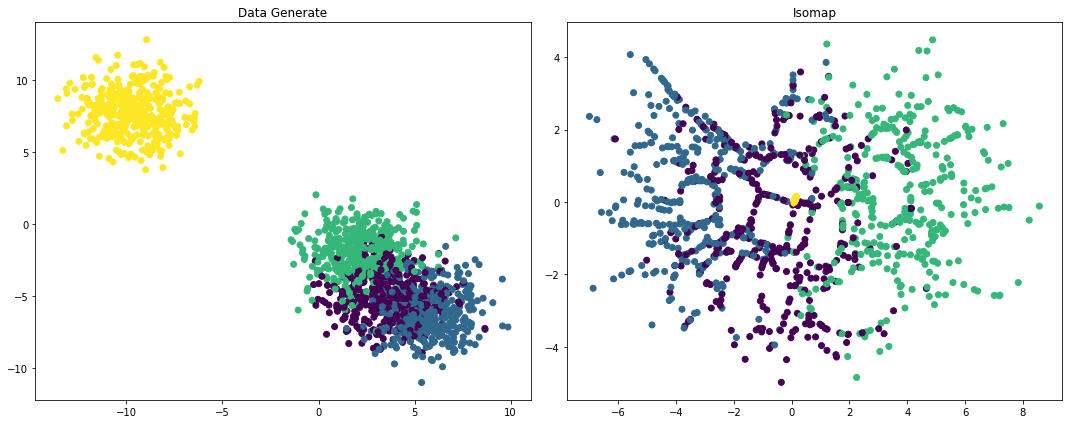

In [17]:
from sklearn.manifold import Isomap

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,6))
ax1.scatter(X[:,0],X[:,1],c=y)
ax1.set_title('Data Generate')
model = Isomap(n_neighbors=4)
tsne_features = model.fit_transform(X)
ax2.set_title('Isomap')
ax2.scatter(tsne_features[:,0] ,tsne_features[:,1],c=y)
plt.tight_layout();

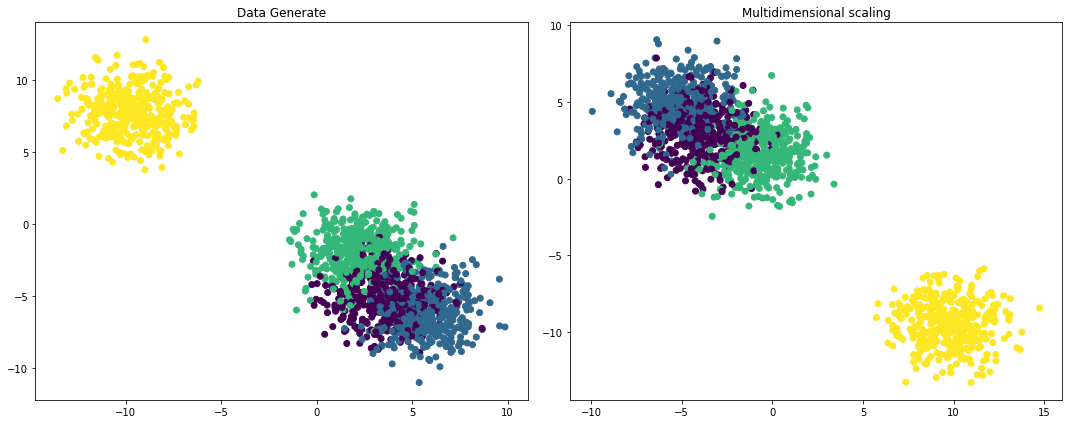

In [18]:
from sklearn.manifold import MDS

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,6))
ax1.scatter(X[:,0],X[:,1],c=y)
ax1.set_title('Data Generate')
model = MDS()
tsne_features = model.fit_transform(X)
ax2.set_title('Multidimensional scaling')
ax2.scatter(tsne_features[:,0] ,tsne_features[:,1],c=y)
plt.tight_layout();

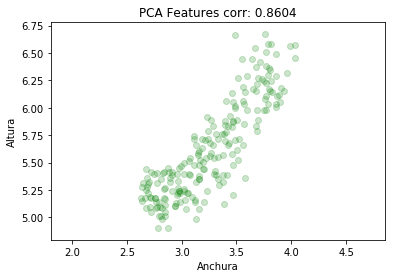

In [19]:
semillas = pd.read_csv('semillas_dimenciones.csv')
from scipy.stats import pearsonr

width = semillas['anchura']
length = semillas['altura']

plt.scatter(width, length,c='g',alpha=.2)
plt.title('Dimenciones de las Semillas')
plt.xlabel('Anchura')
plt.ylabel('Altura')
plt.axis('equal')
plt.title('PCA Features corr: %.4f'%pearsonr(width, length)[0])
plt.show()

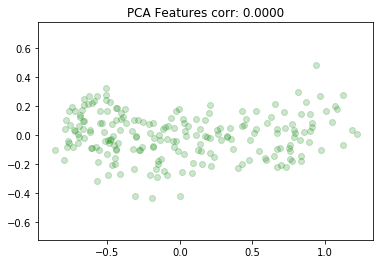

In [20]:
from sklearn.decomposition import PCA

model = PCA(n_components=2)
pca_features = model.fit_transform(semillas)
plt.scatter(pca_features[:,0], pca_features[:,1],c='g',alpha=.2)
plt.axis('equal')
plt.title('PCA Features corr: %.4f'%pearsonr(pca_features[:,0], pca_features[:,1])[0])
plt.show()

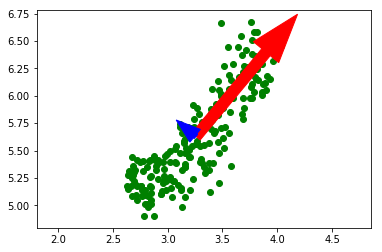

In [21]:
plt.scatter(width, length,c='g')
mean = model.mean_
first_pc = model.components_[0,:]
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.1)

second_pc = model.components_[1,:]
plt.arrow(mean[0], mean[1], second_pc[0]/100, second_pc[1]/100, color='b', width=0.05)
plt.axis('equal')
plt.show()

In [22]:
print('Shape of normal dimensional: %s'%str(semillas.shape))

Shape of normal dimensional: (210, 2)


In [23]:
print('Shape of Principal Dimensional component: %s'%str(pca_features.shape))

Shape of Principal Dimensional component: (210, 2)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
The shape for each digit: (104,)
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]
The shape for each digit: (13, 8)


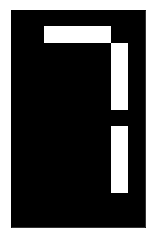

In [24]:
digits = pd.read_csv('digits.csv',header=None)[:].values

seven = digits[0,:]
print(seven)
print("The shape for each digit: %s"%str(seven.shape))

bitmap_seven = seven.reshape(-1,8)
print(bitmap_seven)
print("The shape for each digit: %s"%str(bitmap_seven.shape))

plt.imshow(bitmap_seven, cmap='gray', interpolation='nearest')
plt.xticks([])
plt.yticks([])
plt.show()

Seven Components for each LCD number (100, 7)


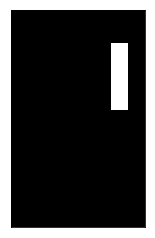

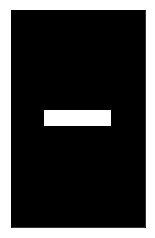

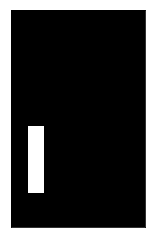

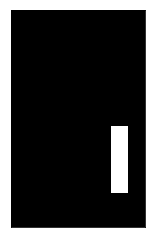

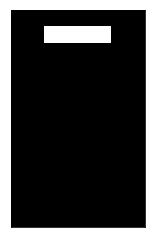

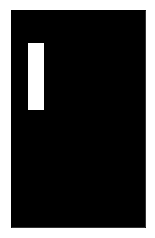

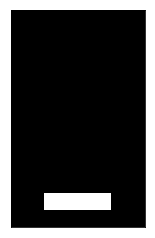

[4.76823559e-01 0.00000000e+00 0.00000000e+00 5.90605054e-01
 4.81559442e-01 0.00000000e+00 7.37557191e-16]


In [25]:
from sklearn.decomposition import NMF

model = NMF(n_components=7)
features = model.fit_transform(digits)
print("Seven Components for each LCD number",features.shape)
for component in model.components_:
    bitmap = component.reshape((13, 8))
    plt.figure()
    plt.imshow(bitmap, cmap='gray', interpolation='nearest')
    plt.xticks([])
    plt.yticks([])
    plt.show()

digit_features = features[0,:]

print(digit_features)

In [26]:
spotify_artists = pd.read_csv('spotify_artists.csv',header=None,names=['Name'])
artist_names = spotify_artists.iloc[:,0]
spotify_artists.sample(5)

,Name
95,Fiona Apple
92,The Mars Volta
97,Rufus Wainwright
84,The Beach Boys
76,Anti-Flag


In [27]:
spotify_artists['artista'] = spotify_artists.index
spotify_artists.head()

,Name,artista
0,Massive Attack,0
1,Sublime,1
2,Beastie Boys,2
3,Neil Young,3
4,Dead Kennedys,4


In [28]:
from sklearn.feature_extraction.text import CountVectorizer
artistCV = CountVectorizer().fit_transform(artist_names)
artistCV

<111x192 sparse matrix of type '<class 'numpy.int64'>'
	with 222 stored elements in Compressed Sparse Row format>

In [29]:
from sklearn.preprocessing import Normalizer, MaxAbsScaler
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(MaxAbsScaler(),
                         NMF(n_components=20),
                         Normalizer())

norm_features = pipeline.fit_transform(artistCV)
df_spotify_normalized = pd.DataFrame(norm_features,index=artist_names)

In [30]:
artist = df_spotify_normalized.loc['AC/DC']
similarities = df_spotify_normalized.dot(artist)
print("The fifth most similar:")
for i_,proba in similarities.nlargest(6)[1:].iteritems():
    print("Artist:\t%s, probability:%.3f"%(i_,proba))

The fifth most similar:
Artist:	Ryan Adams, probability:1.000
Artist:	Fatboy Slim, probability:1.000
Artist:	AC/DC, probability:1.000
Artist:	Dire Straits, probability:1.000
Artist:	Howard Shore, probability:1.000


In [31]:
artist = df_spotify_normalized.loc['The Beach Boys']
similarities = df_spotify_normalized.dot(artist)
print("The fifth most similar:")
for i_,proba in similarities.nlargest(6)[1:].iteritems():
    print("Artist:\t%s,\t probability:%.3f"%(i_,proba))

The fifth most similar:
Artist:	The Police,	 probability:0.748
Artist:	The Prodigy,	 probability:0.748
Artist:	The Beatles,	 probability:0.748
Artist:	The Killers,	 probability:0.748
Artist:	The White Stripes,	 probability:0.743
